<h1><center></center></h1><hr>
<h1><center><b>Unemployment Analysis with Python<hr>
</center></h1>

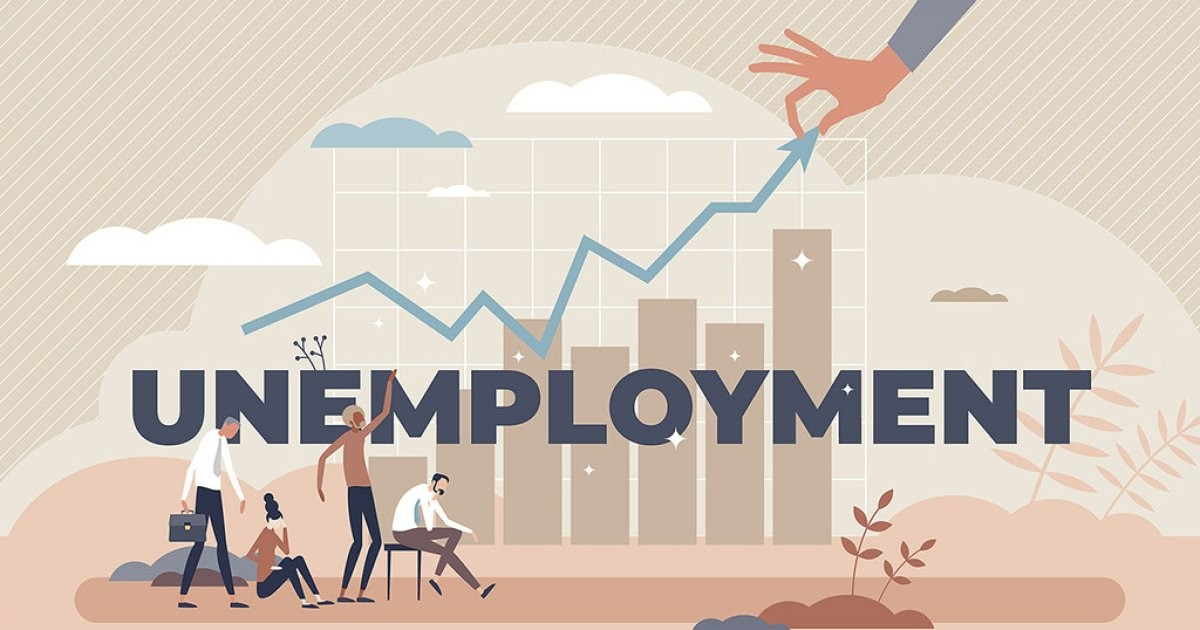

# Table of Contents:
1. <a href='#busund'>Business Understanding</a>


2. <a href='#dataund'>Data Understanding : Exploratory Data Analysis</a>


3. <a href='#prepro'>Data Preparation : Data Pre-Processing</a>


4. <a href='#Visualization'>Data Visualization</a>


5. <a href='#modeling'>Insights & Interpretation</a>

<br><br>
<hr><hr>

# **1 | <a id='busund' style="color:#000000;">Business Understanding</a>**

This dataset explores the impact of the COVID-19 lockdown on employment opportunities and how the unemployment rate increased across different states in India. The pandemic caused widespread economic disruptions, leading to job losses and fluctuations in labor market participation. By analyzing this dataset, we can gain insights into the employment trends before, during, and after the lockdown period.

<strong><h3>About Dataset</h3></strong>
<blockquote>
<div class="alert alert-primary" style="margin-top: 20px">
<p>
The dataset consists of 267 records and 9 variables, providing insights into employment and unemployment trends across different regions in India. It includes details such as the estimated unemployment rate, the number of employed individuals, labor participation rate, geographical information, and timestamps. The dataset helps in analyzing how unemployment varies over time and across different regions.
 </blockquote></p>

---
<strong><h3>Content</h3></strong>
<blockquote>

The dataset contains unemployment data for all Indian states, capturing key employment indicators over time. It includes:

* Region – The geographical division representing different Indian states.
* Date – The timestamp of recorded unemployment data.
* Frequency – The interval at which the data was collected (monthly).
* Estimated Unemployment Rate (%) – The percentage of unemployed individuals in the labor force.
* Estimated Employed – The total number of employed individuals.
* Estimated Labour Participation Rate (%) – The proportion of the working-age population engaged in the labor force.
* Region.1 – A higher-level classification grouping multiple regions together.
* Longitude & Latitude – Geographical coordinates for mapping unemployment trends.
</blockquote>
---




# **2 | <a id='dataund' style="color:#000000;">Data Understanding : Exploratory Data Analysis</a>**

#####  **Import the necessary libraries**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####  **Load data**

In [4]:
# Load Data
#Contains unemployment data from February 2020 to November 2020
df= pd.read_csv("/content/drive/MyDrive/CodeAlpha/unemployment/Unemployment_Rate_upto_11_2020.csv")

In [5]:
#Contains unemployment data from July 2019 to July 2020.
df1= pd.read_csv("/content/drive/MyDrive/CodeAlpha/unemployment/Unemployment in India.csv")

##### **Preview Data**

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


##### **DataFrame Shape**

In [ ]:
df.shape

(267, 9)

In [ ]:
df1.shape

(768, 7)

##### **DataFrame Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


##### **Statistical summary of data**

In [ ]:
# statistical summary of data
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


##### **Missing Values Count**

In [ ]:
df.isna().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


##### **Check for Duplicate Rows**

In [ ]:
# Check for duplicate rows in DataFrame 'df'
duplicate_rows = df.duplicated()

# Display the duplicate rows
df[duplicate_rows]


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude


# **3 | <a id='prepro' style="color:#000000;" >Data Preparation : Pre-Processing</a>**

In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


#####  **Clean Column Names**

In [ ]:
# Remove spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
df1.columns = df1.columns.str.strip()

In [ ]:
print(df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


#####  **Convert Date Column to Datetime**

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])


<ipython-input-58-cc2372053ca6>:1: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"])

<ipython-input-59-3e7620558b14>:1: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



#####  **Check Unique Values in 'Frequency' Column**

In [ ]:
print(df["Frequency"].unique())


[' M']


In [ ]:
df["Region"].nunique()

27

In [ ]:
df["Region.1"].nunique()

5

df["Frequency"].unique() only returns 'M', it means that all the values in the Frequency column are the same. This column does not provide useful information for analysis and can be safely dropped from the dataset.

#####  **Drop the 'Frequency' Columns**

In [ ]:
# Drop the Frequency column
df.drop("Frequency", axis=1, inplace=True)

In [ ]:
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855


# **4 | <a id='Visualization' style="color:#000000;">Data Visualization</a>**

###  **4.1 | <a id='Visualization' style="color:#000000;">Hierarchical Overview of Regions</a>**


###### **1 |  Hierarchy of Regions and Sub-Regions in India**

In [ ]:
fig = px.treemap(df,
                 path=["Region.1", "Region"],  # Hierarchy
                 title="Hierarchy of Regions and Sub-Regions in India",
                 color_discrete_sequence=px.colors.qualitative.Prism
                )
fig.show()

fig = px.sunburst(df,
                  path=["Region.1", "Region"],  # Hierarchy
                  title="Hierarchy of Regions and Sub-Regions in India",
                  color_discrete_sequence=px.colors.qualitative.Dark2
                 )
fig.show()

###### **2 |  Unemployment Rate by Region and Sub-Region**

In [ ]:
unemployment = df[["Region.1", "Region", "Estimated Unemployment Rate (%)"]]

fig = px.sunburst(unemployment,
                  path=["Region.1", "Region"],
                  values="Estimated Unemployment Rate (%)",
                  color="Estimated Unemployment Rate (%)",
                  color_continuous_scale="RdYlGn",
                  title="Unemployment Rate by Region and Sub-Region")

fig.show()

###### **3 |  Estimated Employed by Region and Sub-Region**

In [ ]:
unemployment = df[["Region.1", "Region", "Estimated Employed"]]

fig = px.sunburst(unemployment,
                  path=["Region.1", "Region"],
                  values="Estimated Employed",
                  color="Estimated Employed",
                  color_continuous_scale="RdYlGn",
                  title="Estimated Employed by Region and Sub-Region")

fig.show()

###  **4.2 | <a id='Visualization' style="color:#000000;">Unemployment Rate Analysis</a>**


####  **a | <a id='Visualization' style="color:#000000;">Temporal Trends</a>**
---

###### **1 |  Unemployment Rate Over Time - 2020**

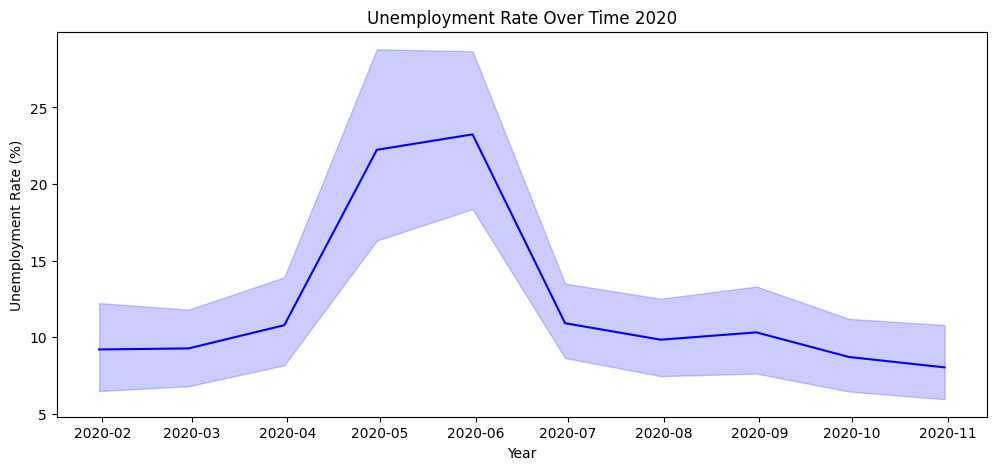

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df["Date"], y=df["Estimated Unemployment Rate (%)"], color="blue")
plt.title("Unemployment Rate Over Time 2020")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

###### **2 |  Unemployment Rate Over Time - 2019-2020**

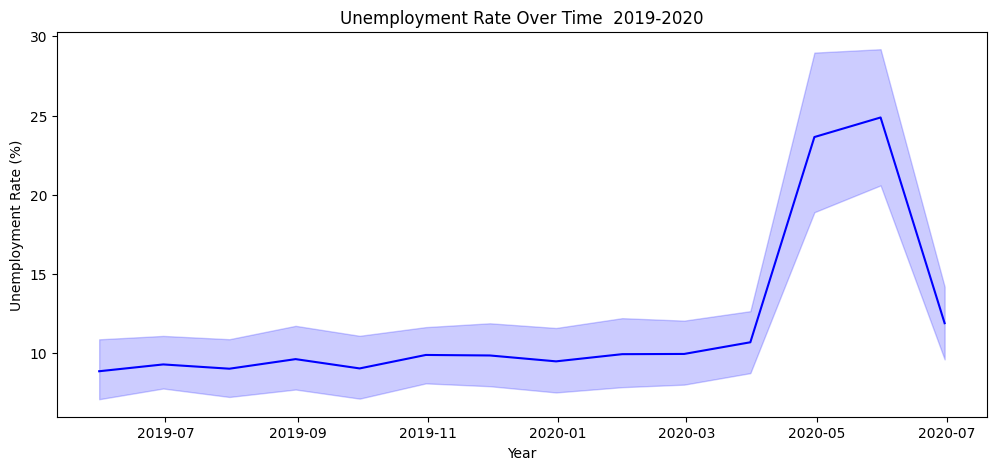

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df1["Date"], y=df1["Estimated Unemployment Rate (%)"], color="blue")
plt.title("Unemployment Rate Over Time  2019-2020")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

####  **b | <a id='Visualization' style="color:#000000;">Regional Distribution</a>**
___

###### **1 |  Unemployment Rate Trends by Region (5)**

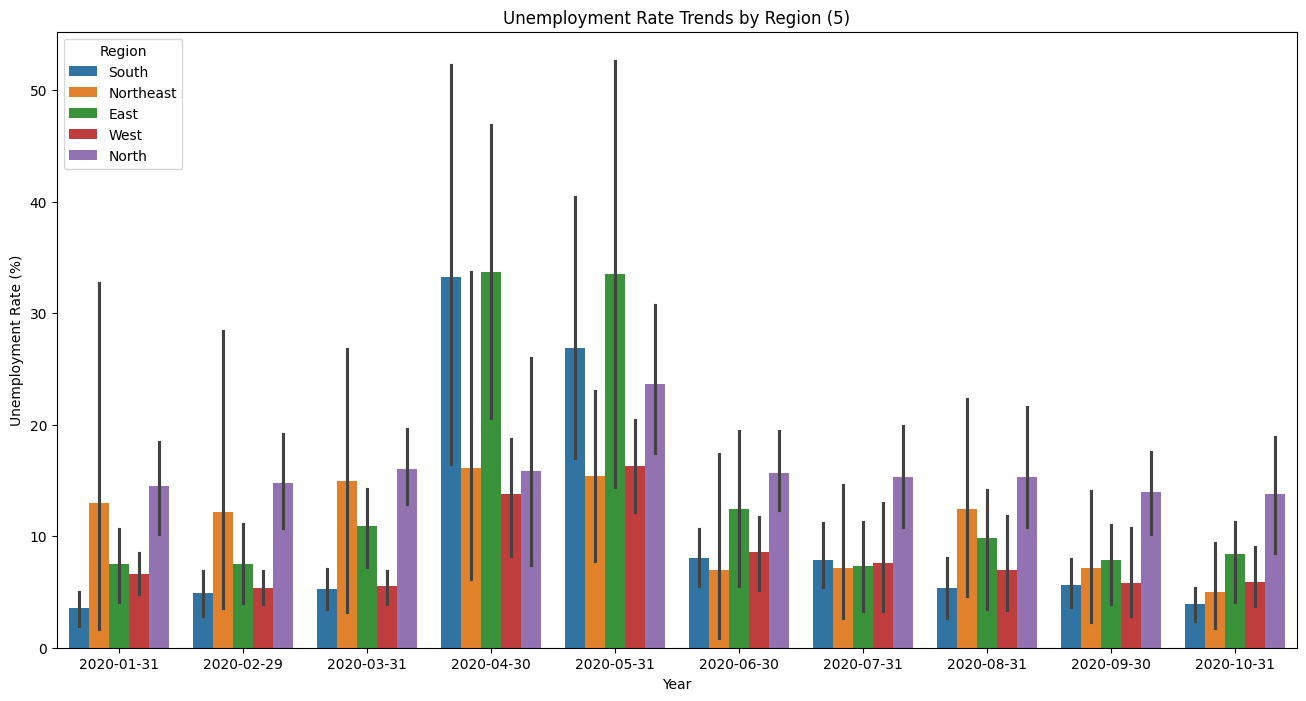

In [ ]:
# Plot unemployment rate trends by region
plt.figure(figsize=(16, 8))
sns.barplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, hue='Region.1', palette='tab10')
plt.title('Unemployment Rate Trends by Region (5)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region',  loc='upper left')
plt.show()

###### **2 |  Unemployment Rate by Region (27)**

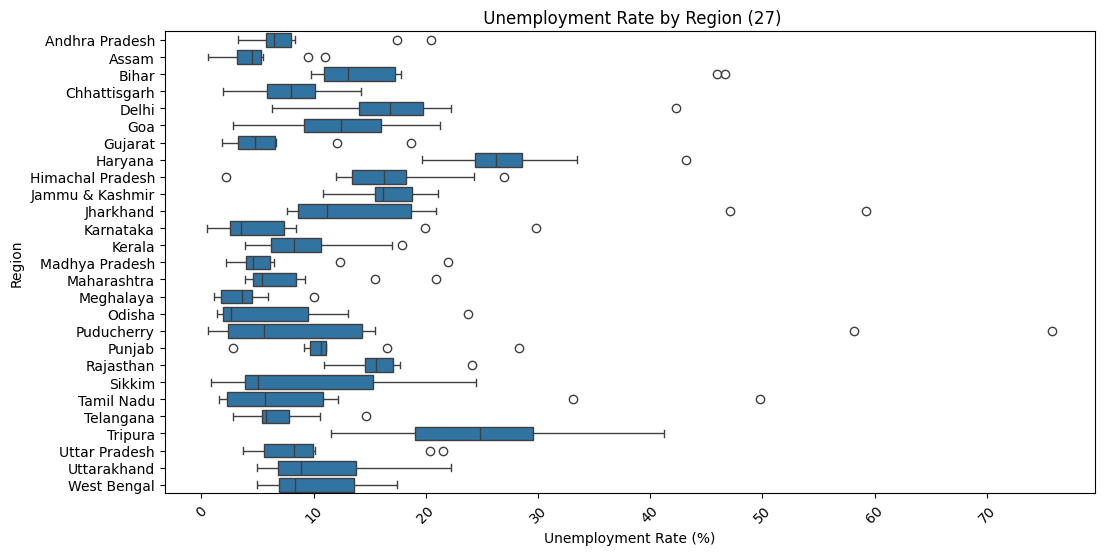

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y="Region", x="Estimated Unemployment Rate (%)", data=df)
plt.title(" Unemployment Rate by Region (27)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.show()

###### **3 |   Distribution of Unemployment Rate**

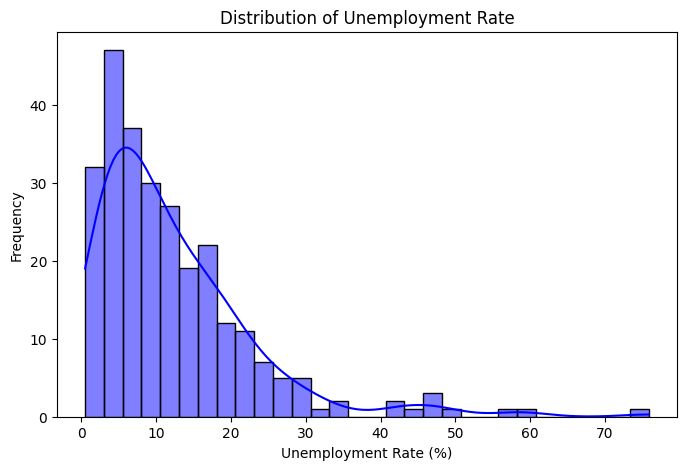

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Estimated Unemployment Rate (%)"], bins=30, kde=True, color='blue')
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

###### **4 |  Distribution of Unemployment Rates by Main Region**

<ipython-input-74-c7f8f88a14a0>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




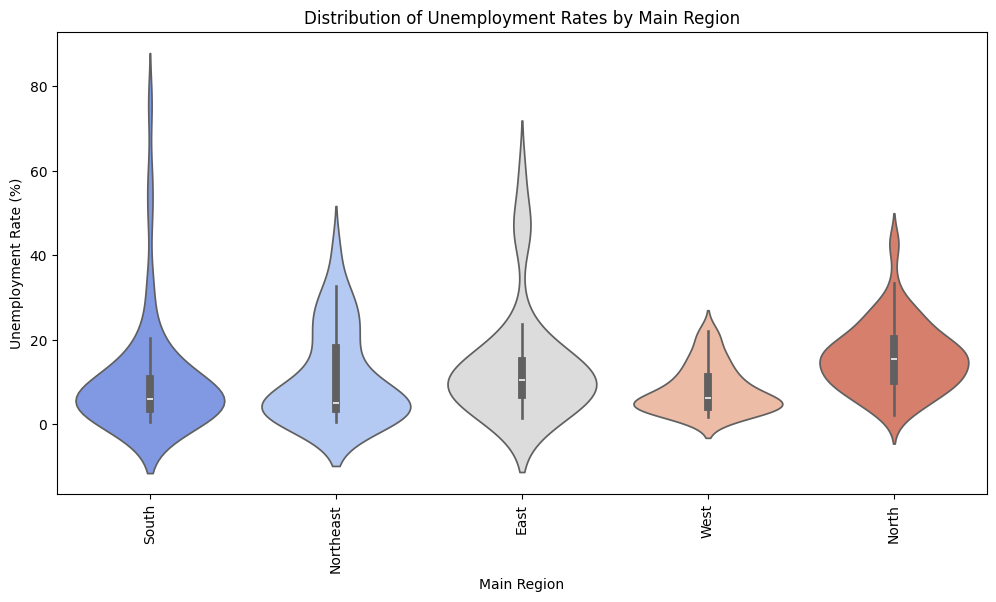

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Region.1", y="Estimated Unemployment Rate (%)", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Distribution of Unemployment Rates by Main Region")
plt.xlabel("Main Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


####  **c | <a id='Visualization' style="color:#000000;">Top Regions with Highest Unemployment</a>**
---

###### **1 |  Top 10 Regions with Highest Unemployment Rates**

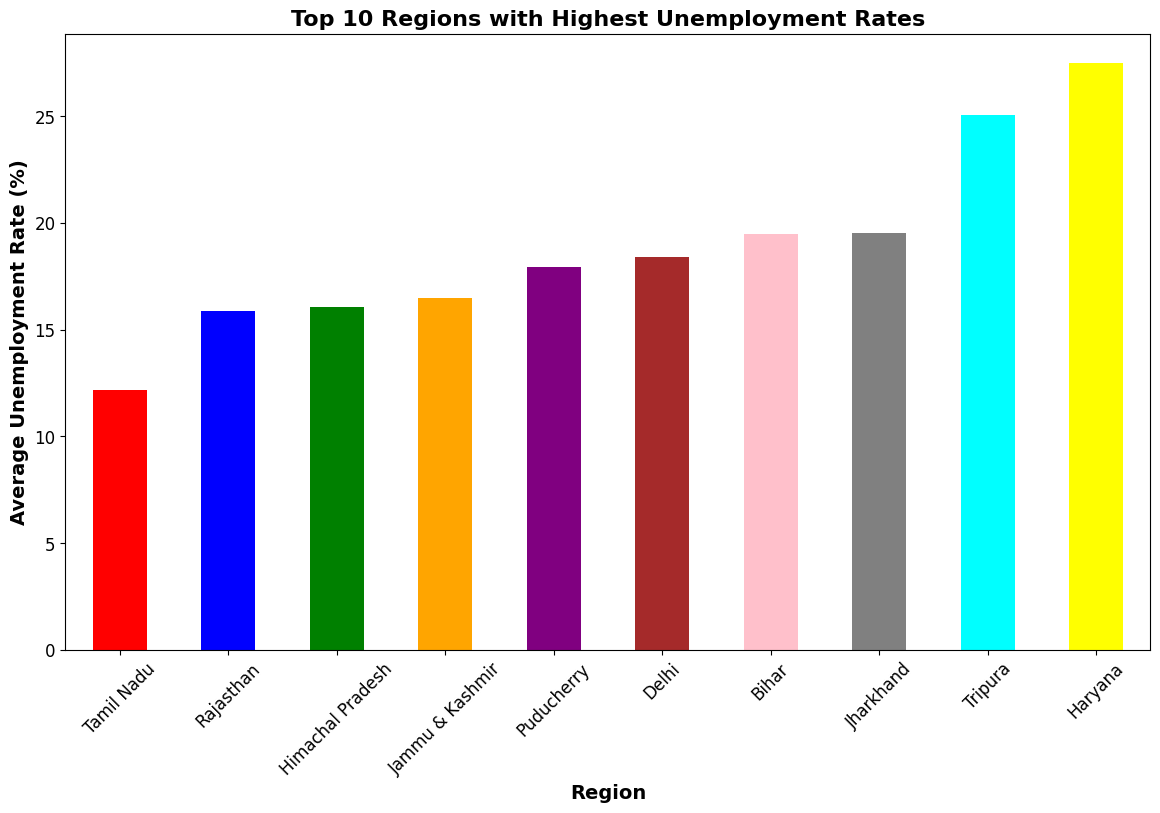

In [ ]:
# Average unemployment rate by region
avg_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# make plot
plt.figure(figsize=(14, 8))
avg_unemployment.tail(10).plot(kind='bar', color='blue')
plt.title('Top 10 Regions with Highest Unemployment Rates', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Average Unemployment Rate (%)', fontsize=14, fontweight='bold')
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellow']
avg_unemployment.tail(10).plot(kind='bar', color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###### **2 |  The 5 Regions with Highest Unemployment Rates**

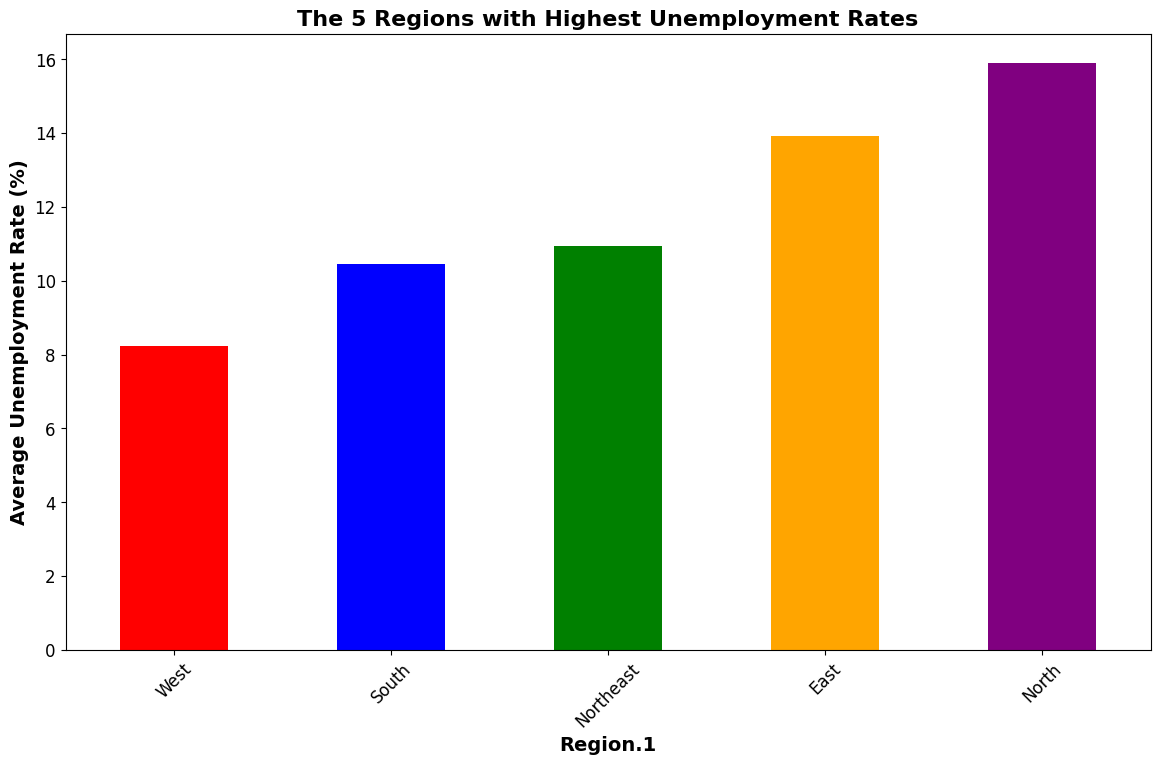

In [ ]:
# Average unemployment rate by region
avg_unemployment = df.groupby('Region.1')['Estimated Unemployment Rate (%)'].mean().sort_values()

# make plot
plt.figure(figsize=(14, 8))
avg_unemployment.tail(10).plot(kind='bar', color='blue')
plt.title('The 5 Regions with Highest Unemployment Rates', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Average Unemployment Rate (%)', fontsize=14, fontweight='bold')
avg_unemployment.tail(10).plot(kind='bar', color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###  **4.3 | <a id='Visualization' style="color:#000000;">Employment Analysis</a>**


####  **a | <a id='Visualization' style="color:#000000;">Temporal Trends</a>**
---

###### **1 |  Estimated Employed Over Time - 2020**

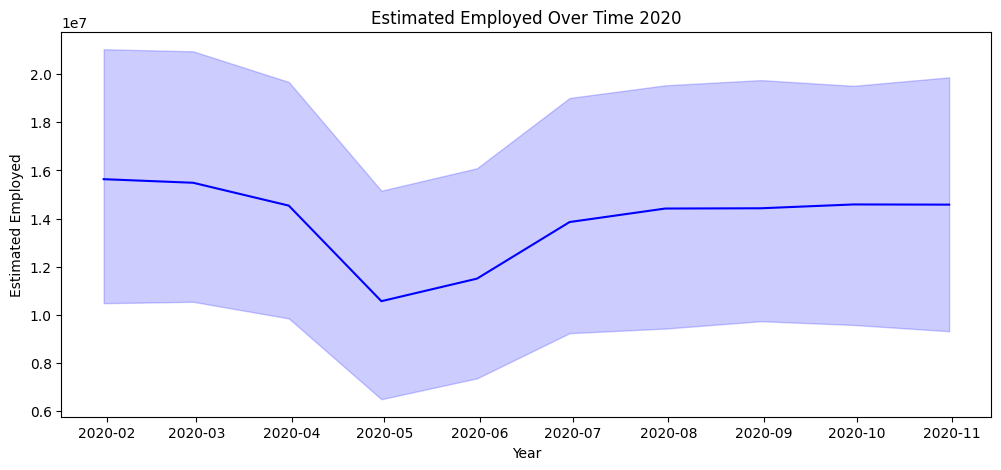

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df["Date"], y=df["Estimated Employed"], color="blue")
plt.title("Estimated Employed Over Time 2020")
plt.xlabel("Year")
plt.ylabel("Estimated Employed")
plt.show()

###### **2 |  Estimated Employed Over Time - 2019-2020**

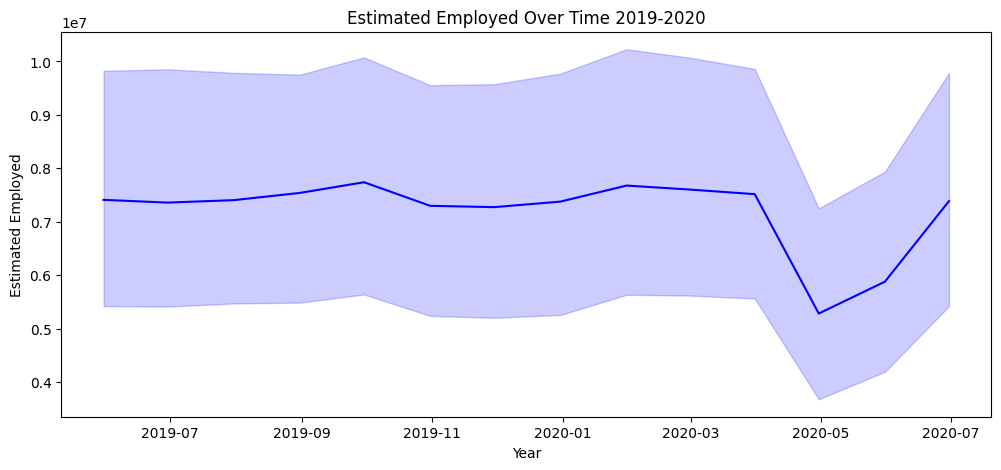

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df1["Date"], y=df1["Estimated Employed"], color="blue")
plt.title("Estimated Employed Over Time 2019-2020")
plt.xlabel("Year")
plt.ylabel("Estimated Employed")
plt.show()

####  **b | <a id='Visualization' style="color:#000000;">Regional Distribution</a>**
___

###### **1 |  Distribution of Estimated Employed by Main Region**

<ipython-input-79-d5702fcb82bd>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




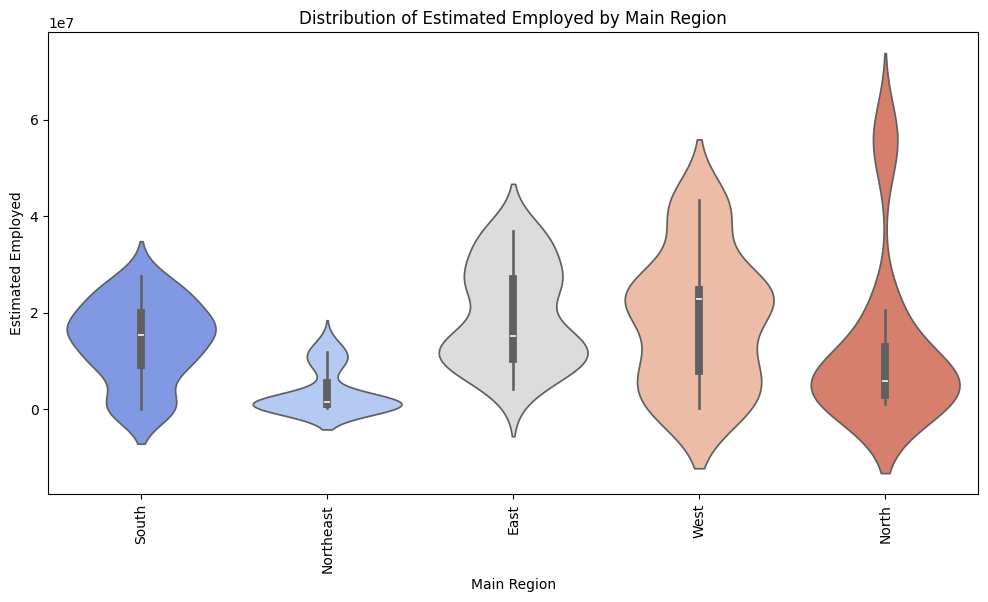

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Region.1", y="Estimated Employed", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Distribution of Estimated Employed by Main Region")
plt.xlabel("Main Region")
plt.ylabel("Estimated Employed")
plt.show()


####  **c | <a id='Visualization' style="color:#000000;">Top Regions with Highest Employment</a>**
---

###### **1 |  Top 10 Regions with Highest Employment Rates**

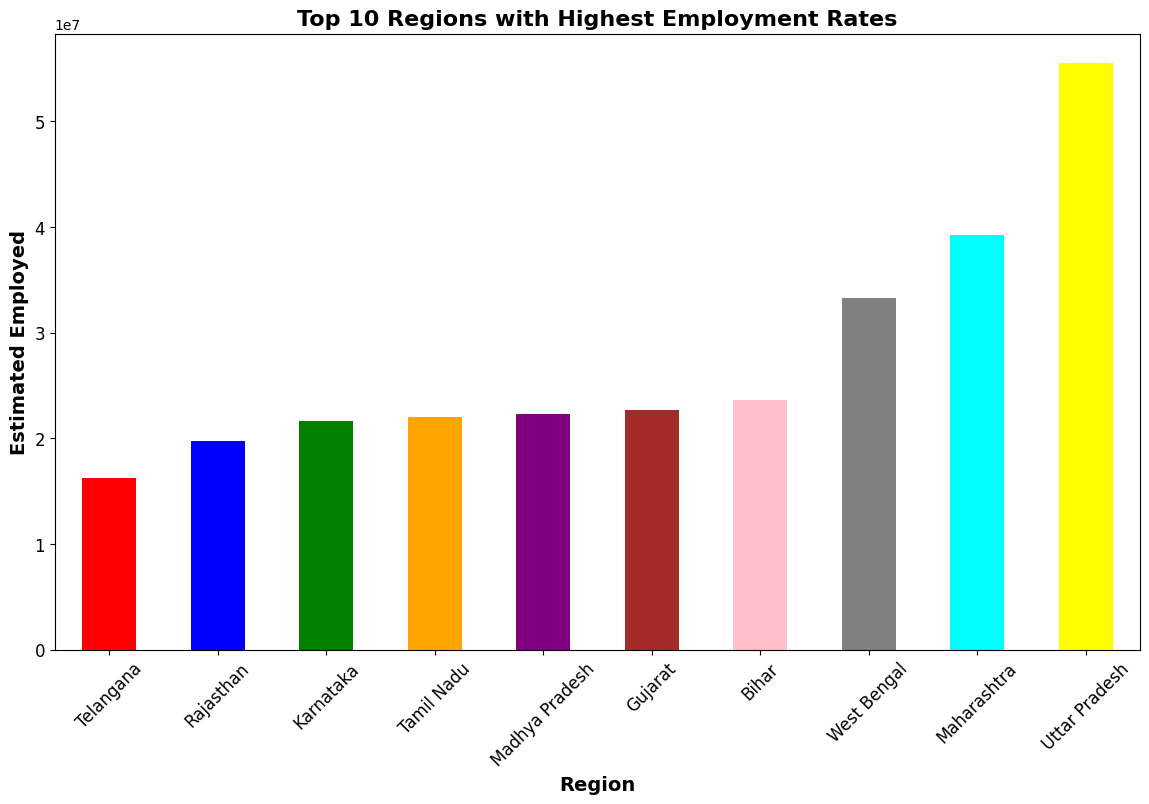

In [ ]:
# Average unemployment rate by region
avg_unemployment = df.groupby('Region')['Estimated Employed'].mean().sort_values()

# make plot
plt.figure(figsize=(14, 8))
avg_unemployment.tail(10).plot(kind='bar', color='blue')
plt.title('Top 10 Regions with Highest Employment Rates', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Estimated Employed', fontsize=14, fontweight='bold')
avg_unemployment.tail(10).plot(kind='bar', color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###### **2 |  The 5 Regions with Highest Estimated Employed**

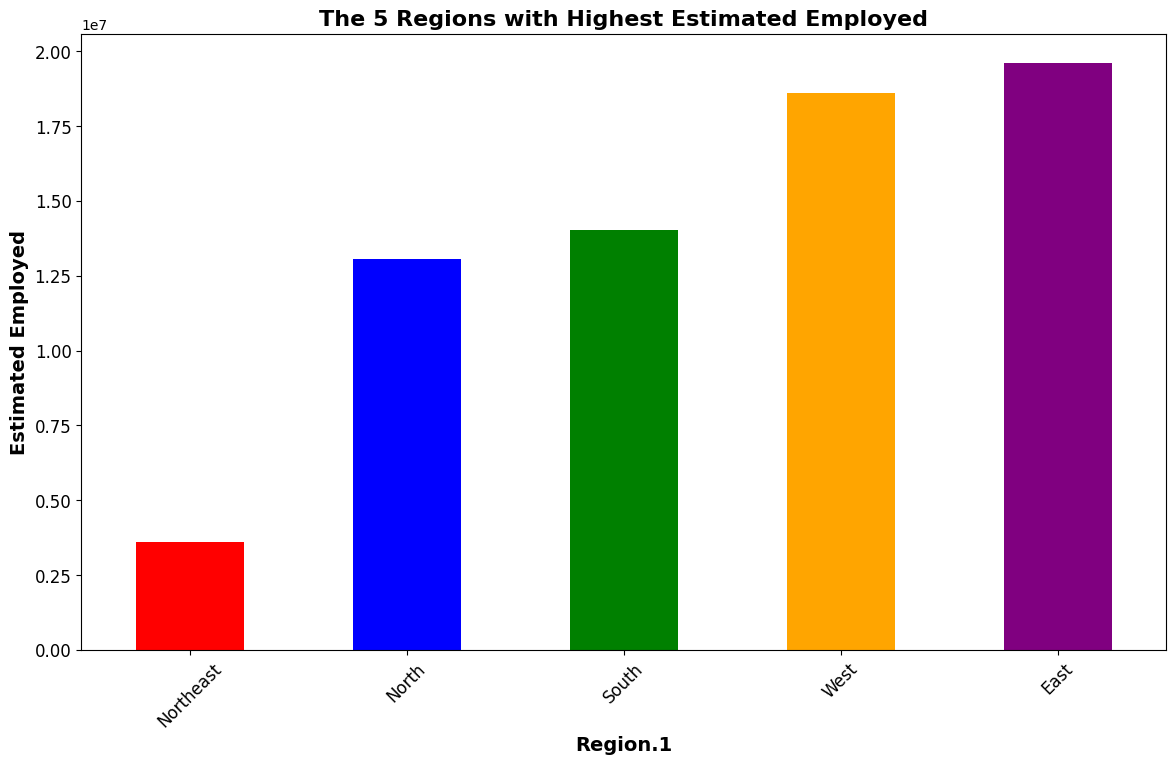

In [ ]:
# Average unemployment rate by region
avg_unemployment = df.groupby('Region.1')['Estimated Employed'].mean().sort_values()

# make plot
plt.figure(figsize=(14, 8))
avg_unemployment.tail(10).plot(kind='bar', color='blue')
plt.title('The 5 Regions with Highest Estimated Employed', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Estimated Employed', fontsize=14, fontweight='bold')
avg_unemployment.tail(10).plot(kind='bar', color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###  **4.4 | <a id='Visualization' style="color:#000000;"> Comparative Analysis</a>**


###### **1 |  Comparison of Estimated Employed and Estimated Unemployment Rate Over Time**

<ipython-input-82-a83ffaeaa217>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-82-a83ffaeaa217>:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




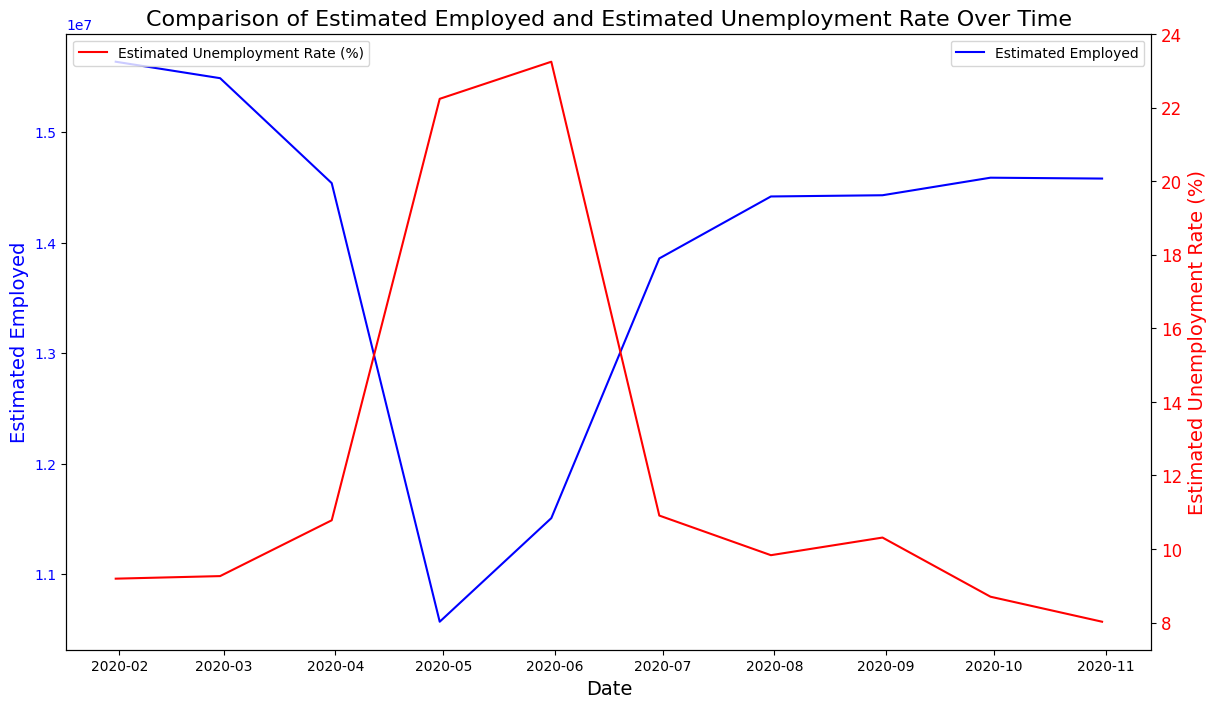

In [ ]:
# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Estimated Employed on the first y-axis (left)
sns.lineplot(x='Date', y='Estimated Employed', data=df, ax=ax1, color='blue', label='Estimated Employed', ci=None)
ax1.set_ylabel('Estimated Employed', color='blue', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comparison of Estimated Employed and Estimated Unemployment Rate Over Time', fontsize=16)

# Create a second y-axis for Estimated Unemployment Rate (%) (right)
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, ax=ax2, color='red', label='Estimated Unemployment Rate (%)' , ci=None)
ax2.set_ylabel('Estimated Unemployment Rate (%)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.show()


<ipython-input-83-e5ce907a4b59>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-83-e5ce907a4b59>:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




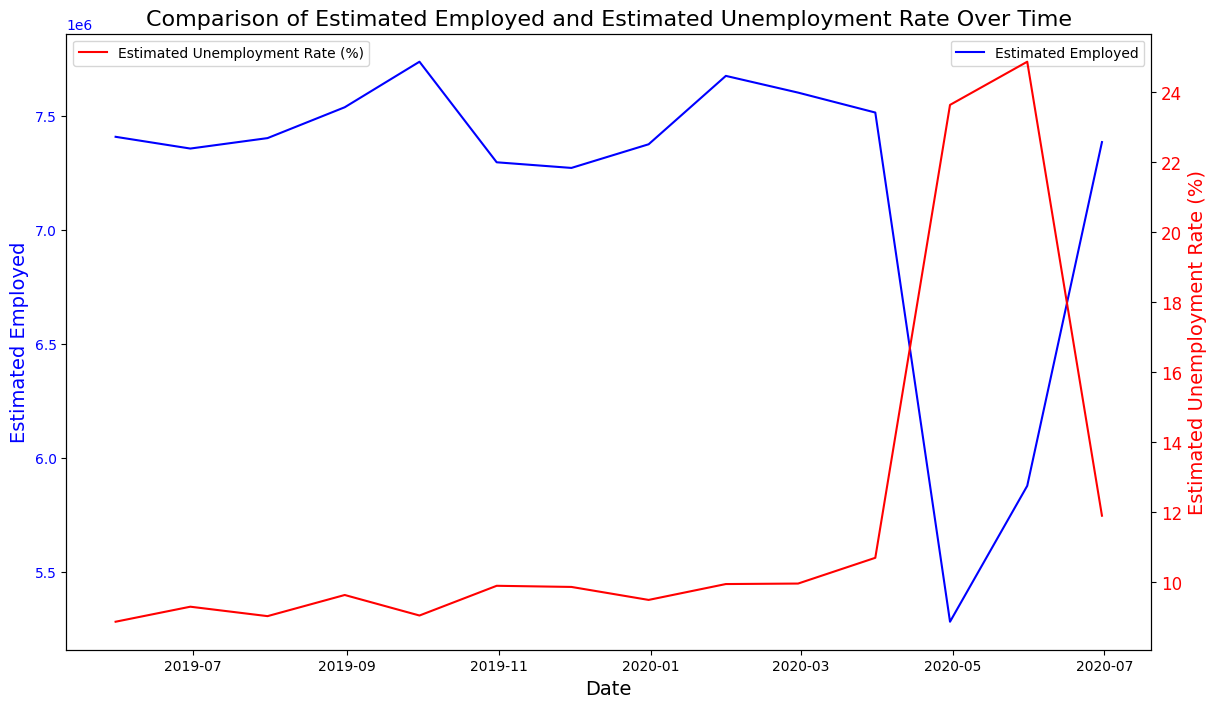

In [ ]:
# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Estimated Employed on the first y-axis (left)
sns.lineplot(x='Date', y='Estimated Employed', data=df1, ax=ax1, color='blue', label='Estimated Employed', ci=None)
ax1.set_ylabel('Estimated Employed', color='blue', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comparison of Estimated Employed and Estimated Unemployment Rate Over Time', fontsize=16)

# Create a second y-axis for Estimated Unemployment Rate (%) (right)
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1, ax=ax2, color='red', label='Estimated Unemployment Rate (%)' , ci=None)
ax2.set_ylabel('Estimated Unemployment Rate (%)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.show()


# **5 | <a id='busund' style="color:#000000;">Insights & Interpretation</a>**

**Unemployment Rate Trends (2019-2020)**

* From July 2019 to April 2020, the unemployment rate remained relatively stable with small variations.

* A sharp increase occurred from April 2020, reaching its peak in June 2020, likely due to the economic impact of COVID-19 lockdowns.

* After June 2020, the unemployment rate gradually declined, returning to values similar to those observed at the start of the period.

**Employment Trends (2019-2020)**
* Employment levels declined significantly starting in April 2020, reaching the lowest point in May and June 2020.
* Following this drop, employment began to recover, eventually returning to pre-pandemic levels.
* This pattern suggests a strong correlation between lockdown measures and employment levels, with job losses concentrated during the strictest periods of economic restrictions.

**Regions with the Highest Unemployment Rates (Mean Values)**
* The North East and North East regions had the highest average unemployment rates, indicating significant economic challenges in these areas.
* Among specific sub-regions, the highest unemployment rates were observed in:
  * Haryana (North Region)
  * Tripura (Northeast Region)
  * Jharkhand (East Region)

**Interpretation & Insights**
* The significant spike in unemployment during mid-2020 strongly suggests the impact of COVID-19 lockdowns on job markets. The fact that employment rebounded afterward indicates some level of recovery, but possibly with long-term economic implications.
* The regions with the highest unemployment rates may face structural issues, such as limited job opportunities, economic instability, or dependency on specific industries that were severely impacted by the pandemic.
* The employment drop and subsequent recovery highlight the resilience of the labor market but also emphasize the vulnerability of certain sectors to economic shocks.
* Further analysis could explore sector-wise employment trends, government interventions, and regional policies to understand the long-term effects of these fluctuations.

<hr><hr>AZZUBHI Rihana<hr><hr>